### 🛠  01. Neural network regression with TensorFlow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the [Boston pricing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) dataset from TensorFlow tf.keras.datasets and model it.

### 📖 01. Neural network regression with TensorFlow Extra-curriculum
* [MIT introduction deep learning lecture 1](https://www.youtube.com/watch?v=7sB052Pz0sQ) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.
* To practice your regression modelling with TensorFlow, I'd also encourage you to look through Lion Bridge's collection of datasets or Kaggle's datasets, find a regression dataset which sparks your interest and try to model.


### 1.1 Create our own data set and build fit a model

In [1]:
import tensorflow as tf

In [2]:
# create a dataset

X = tf.range(-100000,100000,4)
X

<tf.Tensor: shape=(50000,), dtype=int32, numpy=
array([-100000,  -99996,  -99992, ...,   99988,   99992,   99996],
      dtype=int32)>

In [3]:
# Create Labels (y)
y = X+6
y

<tf.Tensor: shape=(50000,), dtype=int32, numpy=array([-99994, -99990, -99986, ...,  99994,  99998, 100002], dtype=int32)>

In [4]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X.numpy(),y.numpy(),test_size=0.25,random_state=42)

In [5]:
len(X),len(X_train),len(X_test)

(50000, 37500, 12500)

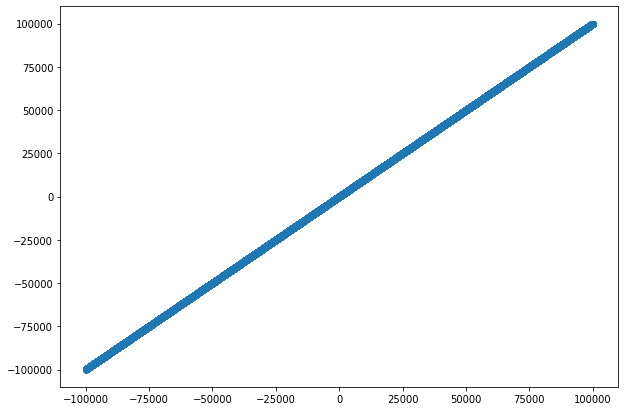

In [6]:
# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train);

#### Model 0:

* 3 Layers
* 10 Epochs
* lr = Default

In [7]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_0 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,name='output_layer')]
)

# Compile model
model_0.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)


In [8]:
# Fit the model
history_0 = model_0.fit(
    X_train,
    y_train,
    epochs = 10
)

Epoch 1/10
1172/1172 [==============================] - 14s 8ms/step - loss: 455.8447 - mae: 455.8447
Epoch 2/10
1172/1172 [==============================] - 3s 3ms/step - loss: 329.5260 - mae: 329.5260
Epoch 3/10
1172/1172 [==============================] - 3s 3ms/step - loss: 276.4688 - mae: 276.4688
Epoch 4/10
1172/1172 [==============================] - 3s 3ms/step - loss: 267.9062 - mae: 267.9062
Epoch 5/10
1172/1172 [==============================] - 3s 3ms/step - loss: 253.3085 - mae: 253.3085
Epoch 6/10
1172/1172 [==============================] - 3s 3ms/step - loss: 247.4671 - mae: 247.4671
Epoch 7/10
1172/1172 [==============================] - 3s 3ms/step - loss: 244.0684 - mae: 244.0684
Epoch 8/10
1172/1172 [==============================] - 3s 3ms/step - loss: 227.5588 - mae: 227.5588
Epoch 9/10
1172/1172 [==============================] - 3s 3ms/step - loss: 211.0568 - mae: 211.0568
Epoch 10/10
1172/1172 [==============================] - 3s 3ms/step - loss: 198.8440 - ma

In [9]:
# Predict 
pred_0 = model_0.predict(X_test)

391/391 [==============================] - 1s 1ms/step


In [10]:
# Creating Evaluation Functions

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)
     



In [11]:
# Evaluate

mae_0 = mae(y_test,pred_0.squeeze()).numpy()
mse_0 = mse(y_test,pred_0.squeeze()).numpy()

mae_0,mse_0

(62.404804, 5185.1084)

### 1.2 Neural Network with 4 Dense layers

#### Model 1:

* 4 Layers
* 10 Epochs
* lr = Default

In [12]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_1 = tf.keras.Sequential(
    [tf.keras.layers.Dense(10000,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1,name='output_layer')]
)

# Compile model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)


In [13]:
# Fit the model
history_1 = model_1.fit(
    X_train,
    y_train,
    epochs = 50
)

Epoch 1/50
1172/1172 [==============================] - 8s 6ms/step - loss: 4119.8491 - mae: 4119.8491
Epoch 2/50
1172/1172 [==============================] - 6s 6ms/step - loss: 1687.3402 - mae: 1687.3402
Epoch 3/50
1172/1172 [==============================] - 6s 5ms/step - loss: 1140.7477 - mae: 1140.7477
Epoch 4/50
1172/1172 [==============================] - 6s 5ms/step - loss: 1197.0538 - mae: 1197.0538
Epoch 5/50
1172/1172 [==============================] - 6s 5ms/step - loss: 796.3864 - mae: 796.3864
Epoch 6/50
1172/1172 [==============================] - 5s 5ms/step - loss: 898.7742 - mae: 898.7742
Epoch 7/50
1172/1172 [==============================] - 6s 5ms/step - loss: 814.7158 - mae: 814.7158
Epoch 8/50
1172/1172 [==============================] - 6s 5ms/step - loss: 734.2469 - mae: 734.2469
Epoch 9/50
1172/1172 [==============================] - 5s 5ms/step - loss: 773.4327 - mae: 773.4327
Epoch 10/50
1172/1172 [==============================] - 5s 5ms/step - loss: 657.41

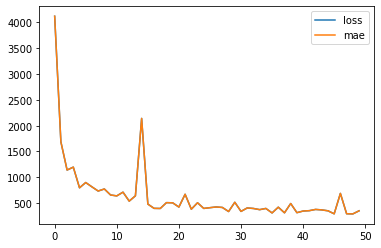

In [14]:
# Plot loss curve
import pandas as pd
pd.DataFrame(history_1.history).plot();

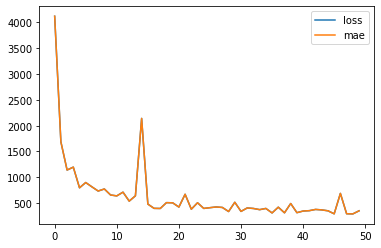

In [15]:
# Plot loss curve
import pandas as pd
pd.DataFrame(history_1.history).plot();

### 1.3 Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

X = insurance.drop('charges',axis=1)
y  = insurance['charges']

# Build out train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

#Transform trianing and test data with Normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_norm  = ct.transform(X_test)

#### Model 0: Building a basic model

In [18]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance = model_insurance.fit(X_train_normal,y_train,epochs=200,verbose=0)

KeyboardInterrupt: ignored

In [ ]:
# Model Evaluation
model_insurance.evaluate(X_test_norm,y_test)

In [ ]:
# Performance Visualization
pd.DataFrame(history_insurance.history).plot()

#### Model 1: Increasing layers

In [ ]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_1 = model_insurance_1.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [ ]:
# Model Evaluation
model_insurance_1.evaluate(X_test_norm,y_test)

In [ ]:
# Performance Visualization
pd.DataFrame(history_insurance_1.history).plot()

#### Model 2: Changing the width of the added layer 

In [ ]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_2 = model_insurance_2.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [ ]:
# Model Evaluation
model_insurance_2.evaluate(X_test_norm,y_test)

In [ ]:
# Performance Visualization
pd.DataFrame(history_insurance_2.history).plot()

#### Model 3: Changing the layer width

In [ ]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_3 = model_insurance_3.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [ ]:
# Model Evaluation
model_insurance_3.evaluate(X_test_norm,y_test)

In [ ]:
# Performance Visualization
pd.DataFrame(history_insurance_3.history).plot()

#### Model 04: Reducing the Learning Rate

Same as model 3 but reducing the learning rate by 10X

In [ ]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.0001),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_4 = model_insurance_4.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [ ]:
# Model Evaluation
model_insurance_4.evaluate(X_test_norm,y_test)

In [ ]:
# Performance Visualization
pd.DataFrame(history_insurance_4.history).plot()

#### Model 05: Increasing Layer Widths

In [ ]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_5.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.1),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_5 = model_insurance_5.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [ ]:
# Model Evaluation
model_insurance_5.evaluate(X_test_norm,y_test)

In [ ]:
# Performance Visualization
pd.DataFrame(history_insurance_5.history).plot()

### 1.4 Boston Housing Dataset

#### Importing Dataset

In [32]:
# Import data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [33]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [34]:
x_train[:10]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01],
       [2.83920e-01, 0.00000e+

In [35]:
y_train[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

#### Model 0: Baseline Model

In [44]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Build the model
model_0 = tf.keras.Sequential(
   [ tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)]
)



# Compile the model
model_0.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# Fit the model
history_0 = model_0.fit(x_train,
                        y_train,
                        epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 5ms/step - loss: 9.0448 - mae: 9.0448
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 7.3164 - mae: 7.3164
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 6.9404 - mae: 6.9404
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 6.5614 - mae: 6.5614
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 6.0897 - mae: 6.0897
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 5.7772 - mae: 5.7772
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 5.7113 - mae: 5.7113
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 5.7268 - mae: 5.7268
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 6.2862 - mae: 6.2862
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 5.5681 - mae: 5.5681
Epoch 11/100
13/13 [==============================] - 0s 3m

In [45]:
# Evaluate the model
model_0.evaluate(x_test,y_test)

4/4 [==============================] - 0s 9ms/step - loss: 4.1293 - mae: 4.1293


[4.129319667816162, 4.129319667816162]

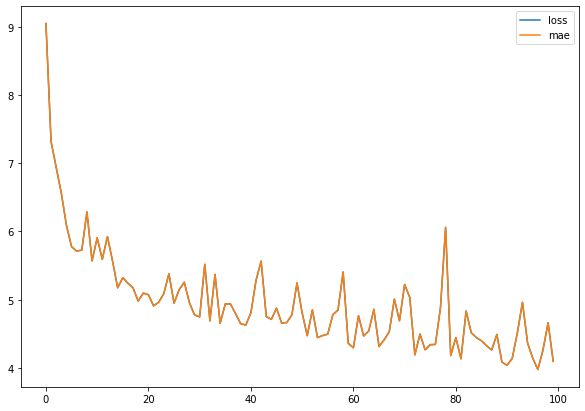

In [47]:
# Plot the loss curves
pd.DataFrame(history_0.history).plot(figsize=(10,7));

#### Model 1: Increasing number of layers

In [49]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])


# Fit the model
history_1 = model_1.fit(x_train,
                        y_train,
                        epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 53.0270 - mae: 53.0270
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 19.8553 - mae: 19.8553
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 11.0253 - mae: 11.0253
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 7.6510 - mae: 7.6510
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 6.8505 - mae: 6.8505
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 6.5617 - mae: 6.5617
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 6.5084 - mae: 6.5084
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 6.3448 - mae: 6.3448
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 6.4482 - mae: 6.4482
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 6.1398 - mae: 6.1398
Epoch 11/100
13/13 [==============================] -

In [50]:
# Evaluate the model
model_1.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 4.3964 - mae: 4.3964


[4.396434307098389, 4.396434307098389]

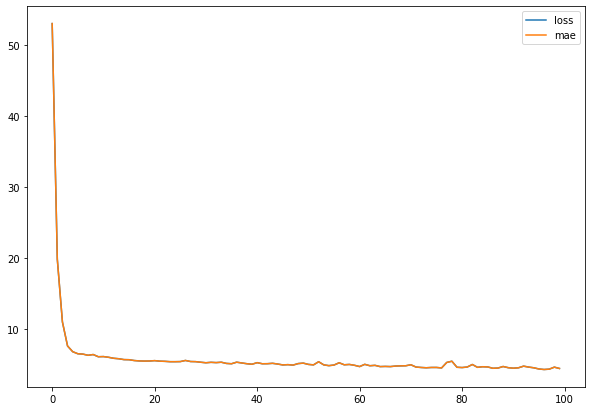

In [52]:
# Plot loss curves
pd.DataFrame(history_1.history).plot(figsize=(10,7));

#### Model 2: Increase number of epochs

Increase the number of epochs to 400

In [71]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['mae'])

# Fit the model
history_2 = model_2.fit(x_train,
                        y_train,
                        epochs = 400)

Epoch 1/400
13/13 [==============================] - 0s 3ms/step - loss: 28.2631 - mae: 28.2631
Epoch 2/400
13/13 [==============================] - 0s 3ms/step - loss: 12.1917 - mae: 12.1917
Epoch 3/400
13/13 [==============================] - 0s 3ms/step - loss: 8.0696 - mae: 8.0696
Epoch 4/400
13/13 [==============================] - 0s 4ms/step - loss: 6.6563 - mae: 6.6563
Epoch 5/400
13/13 [==============================] - 0s 3ms/step - loss: 6.5021 - mae: 6.5021
Epoch 6/400
13/13 [==============================] - 0s 3ms/step - loss: 6.4861 - mae: 6.4861
Epoch 7/400
13/13 [==============================] - 0s 3ms/step - loss: 6.3146 - mae: 6.3146
Epoch 8/400
13/13 [==============================] - 0s 3ms/step - loss: 6.1753 - mae: 6.1753
Epoch 9/400
13/13 [==============================] - 0s 3ms/step - loss: 6.8503 - mae: 6.8503
Epoch 10/400
13/13 [==============================] - 0s 3ms/step - loss: 5.7355 - mae: 5.7355
Epoch 11/400
13/13 [==============================] - 0

In [72]:
# Evaluate
model_2.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.1828 - mae: 3.1828


[3.182814598083496, 3.182814598083496]

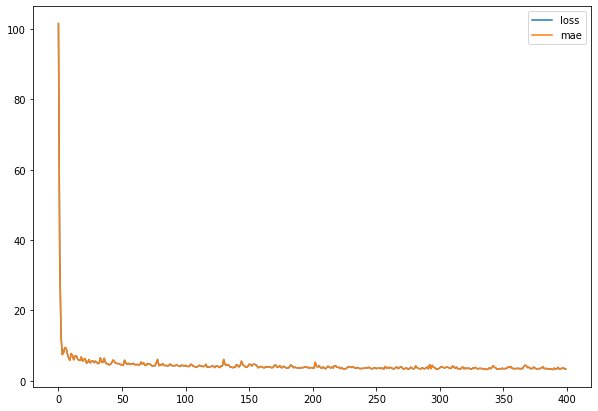

In [68]:
# Plot the loss curves
pd.DataFrame(history_2.history).plot(figsize=(10,7));

#### Model 3: Changing depth and width

In [63]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['mae'])

# Fit the model
history_3 = model_3.fit(x_train,
                        y_train,
                        epochs = 400)

Epoch 1/400
13/13 [==============================] - 1s 3ms/step - loss: 114.6887 - mae: 114.6887
Epoch 2/400
13/13 [==============================] - 0s 4ms/step - loss: 37.5136 - mae: 37.5136
Epoch 3/400
13/13 [==============================] - 0s 3ms/step - loss: 14.8664 - mae: 14.8664
Epoch 4/400
13/13 [==============================] - 0s 3ms/step - loss: 8.3196 - mae: 8.3196
Epoch 5/400
13/13 [==============================] - 0s 3ms/step - loss: 7.1893 - mae: 7.1893
Epoch 6/400
13/13 [==============================] - 0s 3ms/step - loss: 6.2976 - mae: 6.2976
Epoch 7/400
13/13 [==============================] - 0s 4ms/step - loss: 6.4243 - mae: 6.4243
Epoch 8/400
13/13 [==============================] - 0s 3ms/step - loss: 5.9093 - mae: 5.9093
Epoch 9/400
13/13 [==============================] - 0s 4ms/step - loss: 6.1450 - mae: 6.1450
Epoch 10/400
13/13 [==============================] - 0s 3ms/step - loss: 6.1383 - mae: 6.1383
Epoch 11/400
13/13 [==============================]

In [64]:
# Evaluate the model
model_3.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 3.2168 - mae: 3.2168


[3.2167932987213135, 3.2167932987213135]

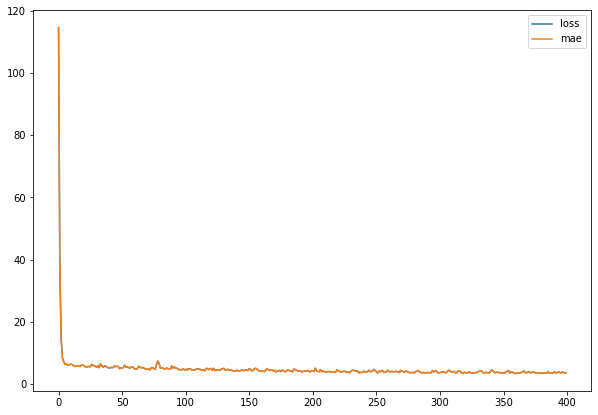

In [65]:
# Plot the loss curves
pd.DataFrame(history_3.history).plot(figsize=(10,7))

#### Model 4: Adding an activation function and increasing the learning rate

In [100]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(13,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ['mae'])

# Fit the model
history_4 = model_4.fit(x_train,
                        y_train,
                        epochs = 400)

Epoch 1/400


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


13/13 [==============================] - 1s 5ms/step - loss: 19.2582 - mae: 19.2582
Epoch 2/400
13/13 [==============================] - 0s 6ms/step - loss: 8.8746 - mae: 8.8746
Epoch 3/400
13/13 [==============================] - 0s 4ms/step - loss: 6.3513 - mae: 6.3513
Epoch 4/400
13/13 [==============================] - 0s 4ms/step - loss: 6.2049 - mae: 6.2049
Epoch 5/400
13/13 [==============================] - 0s 4ms/step - loss: 5.6243 - mae: 5.6243
Epoch 6/400
13/13 [==============================] - 0s 3ms/step - loss: 5.5616 - mae: 5.5616
Epoch 7/400
13/13 [==============================] - 0s 3ms/step - loss: 5.6928 - mae: 5.6928
Epoch 8/400
13/13 [==============================] - 0s 3ms/step - loss: 6.0193 - mae: 6.0193
Epoch 9/400
13/13 [==============================] - 0s 3ms/step - loss: 5.7003 - mae: 5.7003
Epoch 10/400
13/13 [==============================] - 0s 4ms/step - loss: 5.2038 - mae: 5.2038
Epoch 11/400
13/13 [==============================] - 0s 3ms/step - l

In [101]:
# Evaluate the model
model_4.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.1096 - mae: 3.1096


[3.1096465587615967, 3.1096465587615967]

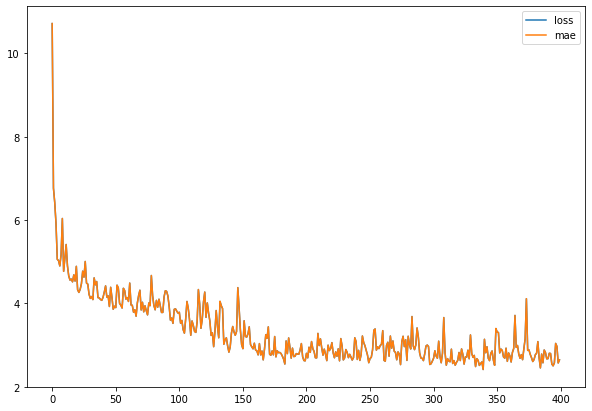

In [99]:
# Plot loss curves
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
3.1096